## cross-validation

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_digits
dataset = load_digits()
X,y = dataset.data,dataset.target == 1
clf = SVC(kernel='linear',C=1)

print('Cross-validation(accuracy)',cross_val_score(clf,X,y,cv=5))
print('Cross-validation(AUC)',cross_val_score(clf,X,y,cv=5,scoring='roc_auc'))
print('Cross-validation(recall)',cross_val_score(clf,X,y,cv=5,scoring='recall'))

Cross-validation(accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation(AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation(recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


## grid search example

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

dataset = load_digits()
X,y = dataset.data,dataset.target == 1
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
clf = SVC(kernel='rbf')
grid_values = {'gamma':[0.001,0.01,0.05,0.1,1,10,100]}
# 即需要最优化的参数的取值
grid_clf_acc = GridSearchCV(clf,param_grid=grid_values)
grid_clf_acc.fit(X_train,y_train)
print('Grid best parameter(max, accuracy):',grid_clf_acc.best_params_)
print('Grid best score( accuracy):',grid_clf_acc.best_score_)

grid_clf_auc = GridSearchCV(clf,param_grid=grid_values,scoring='roc_auc')
grid_clf_auc.fit(X_train,y_train)
# 返回决策函数值（比如svm中的决策距离）
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)
print('Test set AUC:',roc_auc_score(y_test,y_decision_fn_scores_auc))
print('Grid best parameter(max, AUC):',grid_clf_auc.best_params_)
print('Grid best score( AUC):',grid_clf_auc.best_score_)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter(max, accuracy): {'gamma': 0.001}
Grid best score( accuracy): 0.9962880475129918


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Test set AUC: 0.99982858122393
Grid best parameter(max, AUC): {'gamma': 0.001}
Grid best score( AUC): 0.9998741278302142


## Evaluation metrics supported for model selection

In [3]:
from sklearn.metrics.scorer import SCORERS
sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

## optimizing a classifie using different avaluation metrics


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1 ## 2
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = cls.ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = cls.ListedColormap(color_list_bold[0:numClasses])

    h = 0.03 # 间隔 
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

  


    plt.show()

(1347, 64)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: F

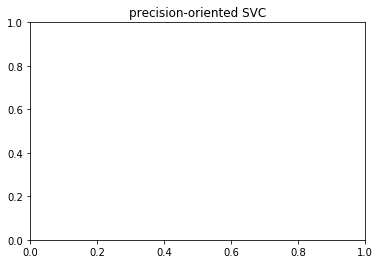

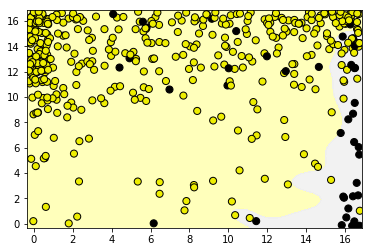

Grid best parameter(max.precision):{'class_weight': {1: 2}}
Grid best score( precision:0.5026979941054228):


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: F

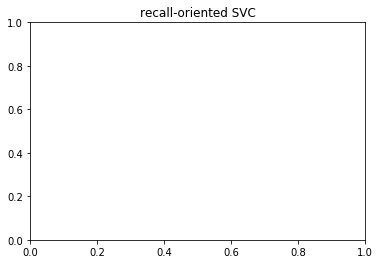

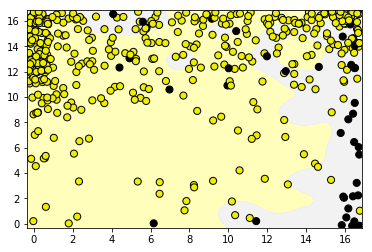

Grid best parameter(max.recall):{'class_weight': {1: 20}}
Grid best score( recall:0.9068303359574537):


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: F

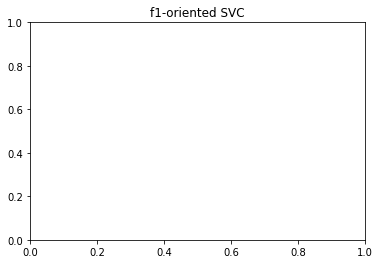

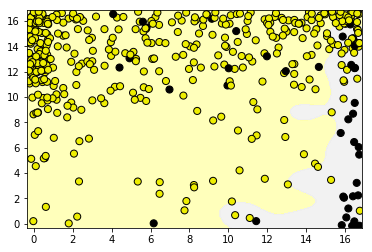

Grid best parameter(max.f1):{'class_weight': {1: 3}}
Grid best score( f1:0.5623043711405121):


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: F

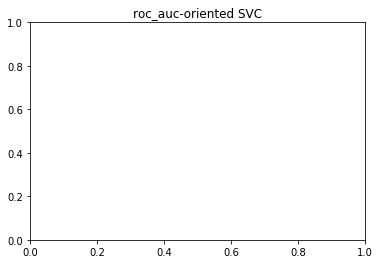

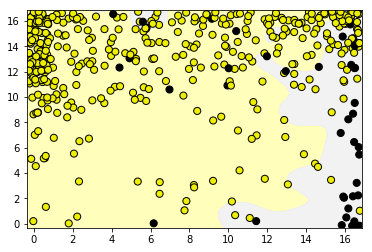

Grid best parameter(max.roc_auc):{'class_weight': 'balanced'}
Grid best score( roc_auc:0.8652488790370783):


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
dataset = load_digits()
X,y = dataset.data,dataset.target == 1
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]] + np.random.rand(X_train.shape[0],2) - jitter_delta
# 选第21列和60列拼成一个n行2列的数组
X_twovar_test = X_test[:,[20,59]] + np.random.rand(X_test.shape[0],2) - jitter_delta
print(X_train.shape)
grid_values = {'class_weight':['balanced',{1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}

for i,eval_metric in enumerate(('precision','recall','f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf,param_grid=grid_values,scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train,y_train)

    plt.title(eval_metric + '-oriented SVC')
    plot_class_regions_for_classifier(grid_clf_custom,X_twovar_test,y_test)
    print('Grid best parameter(max.{0}):{1}'.format(eval_metric,grid_clf_custom.best_params_))
    print('Grid best score( {0}:{1}):'.format(eval_metric,grid_clf_custom.best_score_))


## precison-recall curve for default SVC classifier

(1347, 64)


<Figure size 432x288 with 0 Axes>

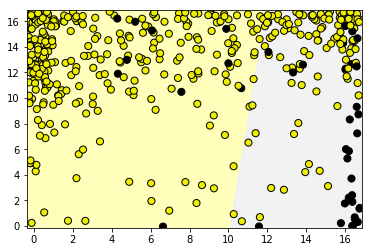

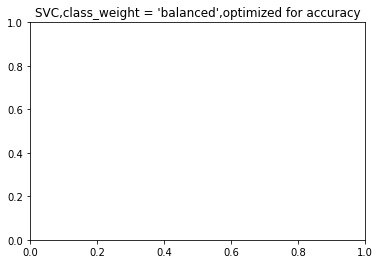

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


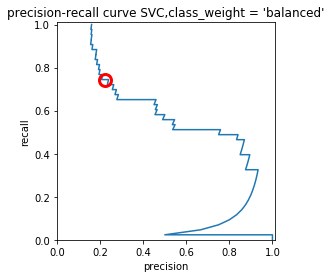

at zero threshold .precision: 0.22,recall: 0.74


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
dataset = load_digits()
X,y = dataset.data,dataset.target == 1
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]] + np.random.rand(X_train.shape[0],2) - jitter_delta
# 选第21列和60列拼成一个n行2列的数组
X_twovar_test = X_test[:,[20,59]] + np.random.rand(X_test.shape[0],2) - jitter_delta
print(X_train.shape)
clf = SVC(kernel='linear',class_weight='balanced').fit(X_twovar_train,y_train)
y_scores = clf.decision_function(X_twovar_test)
precision,recall,thresholds = precision_recall_curve(y_test,y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plot_class_regions_for_classifier(clf,X_twovar_test,y_test)
plt.title("SVC,class_weight = 'balanced',optimized for accuracy")
plt.show()
plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.title("precision-recall curve SVC,class_weight = 'balanced'")
plt.plot(precision,recall,label = 'precision-recall curve')
plt.plot(closest_zero_p,closest_zero_r,'o',markersize=12,fillstyle='none',c='r',mew=3)
plt.xlabel('precision')
plt.ylabel('recall')
plt.axes().set_aspect('equal')
plt.show()
print('at zero threshold .precision: {:.2f},recall: {:.2f}'.format(closest_zero_p,closest_zero_r))